In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
plt.rcParams["figure.figsize"] = (12, 9)

### Chi-squared distribution
### Распределение хи-квадрат
[Википедия](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82)

$k$ - количество степеней свободы

$EX = k$

$DX = 2 * k$

In [3]:
k = 2
EX = k
DX = 2 * k

#### Создание выборки

In [4]:
data = np.random.chisquare(k, 1000)

#### Гистограмма и плотность распределения

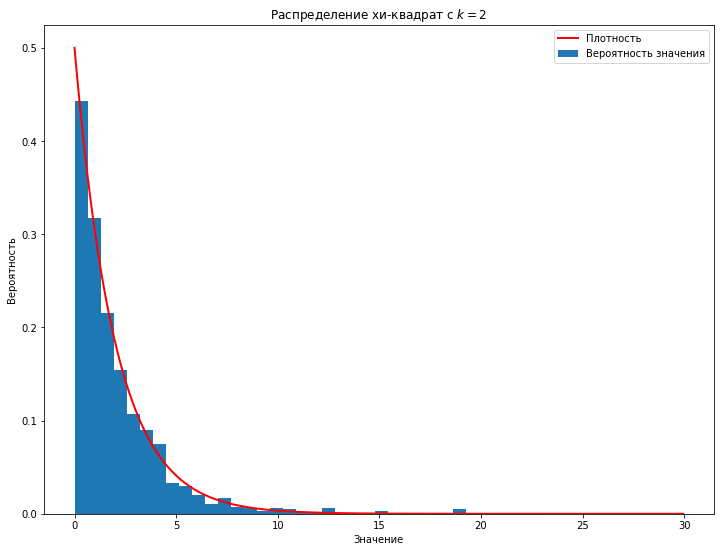

In [5]:
plt.hist(data, bins=30, density=True, label='Вероятность значения')
x = np.arange(0, 30, .05)
plt.plot(x, stats.chi2.pdf(x, df=k), color='r', lw=2, label='Плотность')

plt.title(f'Распределение хи-квадрат c $k={k}$')
plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.legend()
plt.show()

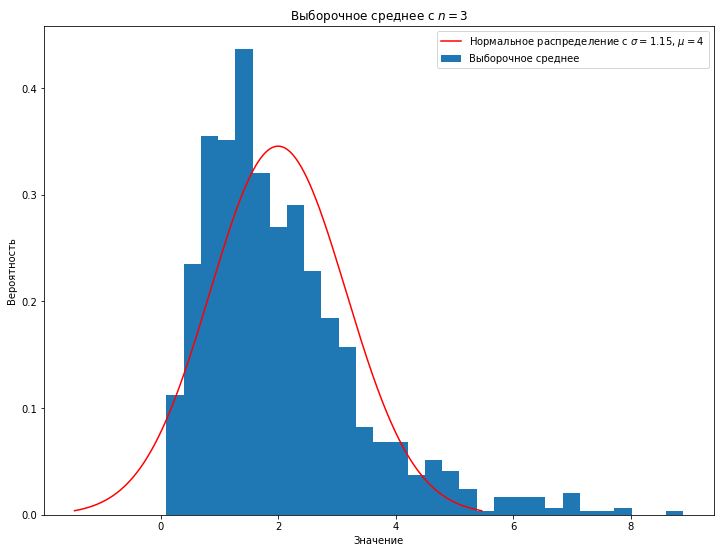

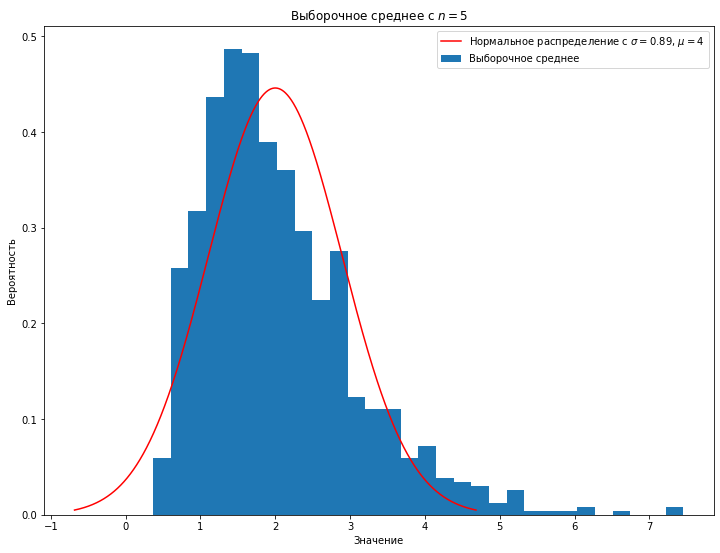

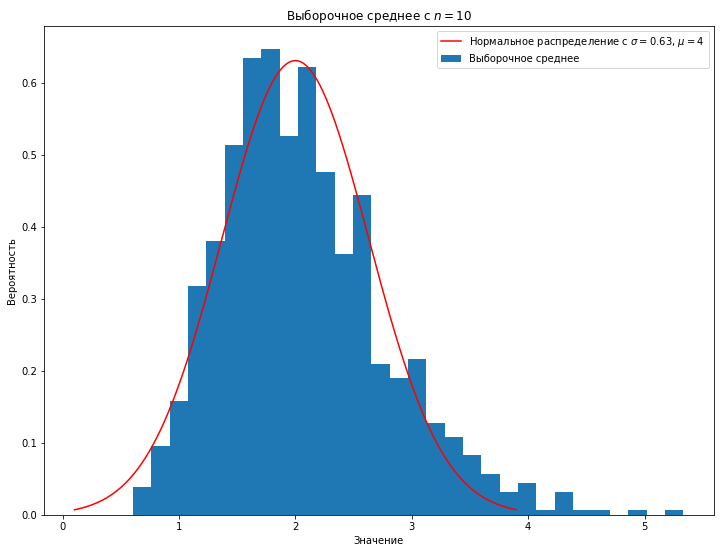

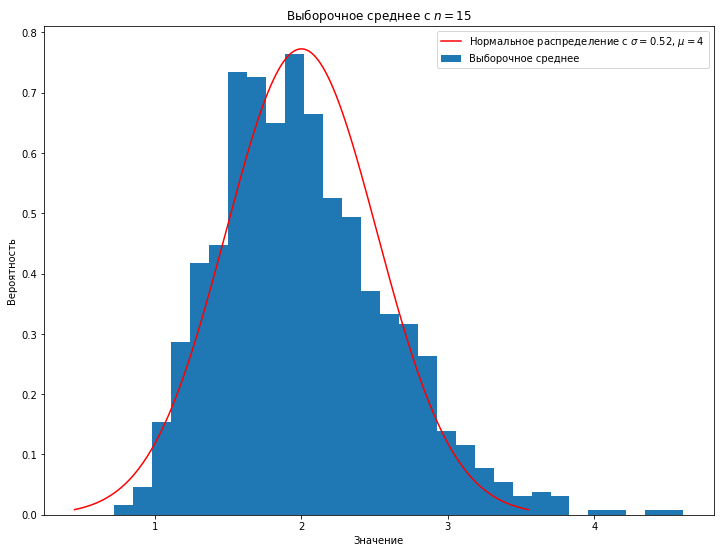

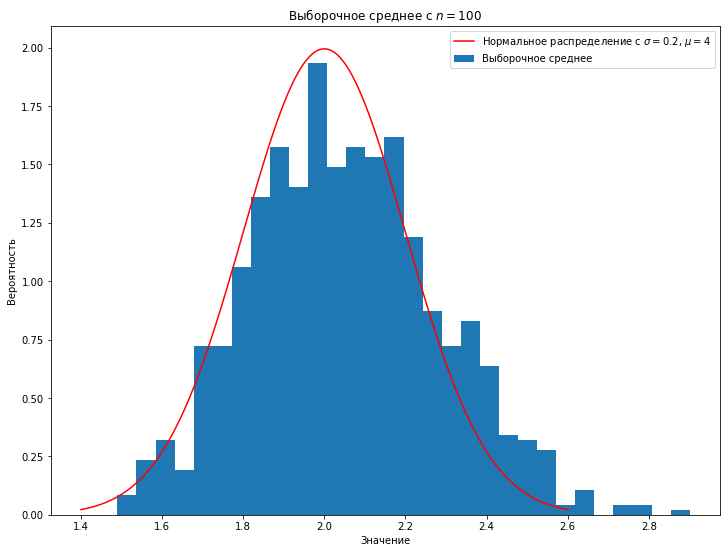

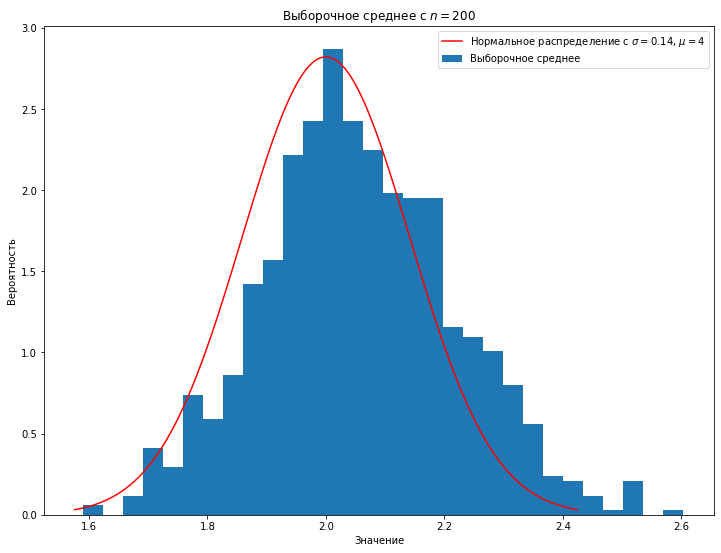

In [6]:
for n in [3, 5, 10, 15, 100, 200]:
    # Параметры нормального распеделения из ЦПТ
    sigma = np.sqrt(DX / n)
    x = np.linspace(EX - 3 * sigma, EX + 3 * sigma, 1000)

    # Выборочное среднее
    new_data = [np.mean(np.random.choice(data, n)) for i in range(1000)]
    
    plt.hist(new_data, bins=30, density=True, label=f'Выборочное среднее')
    plt.plot(x, stats.norm.pdf(x, EX, sigma), color='r',
             label=f'Нормальное распределение с $\sigma={round(sigma, 2)}$, '
                   f'$\mu={DX}$')
    plt.title(f'Выборочное среднее c $n={n}$')
    plt.xlabel('Значение')
    plt.ylabel('Вероятность')
    plt.legend()
    
    plt.show()

### Выводы

ЦПТ позволяет от случайного распределения перейти к нормальному. Чем больше парамет n, тем болше новое распределение напоминает нормальное